# 支持向量基（SVM）是一类特别强大和灵活的分类和回归监督算法。

可以同时做分类，也可做回归预测


In [120]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## 1. SVM原理
1.1 导入标准数据

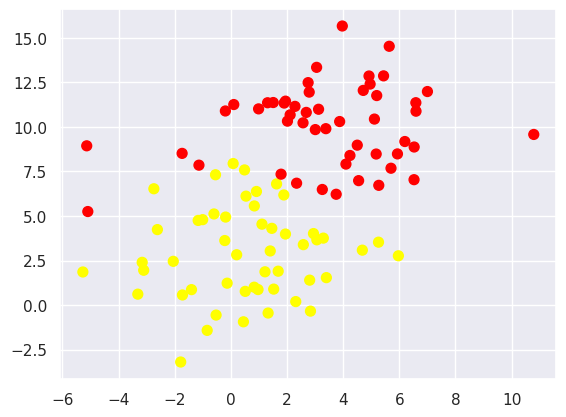

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=1024, cluster_std=2.5)
# cluster_std 越大越弥散
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.show()

#### **最大化边际** 有几个训练点刚刚触及边际：图中的线上的点就是它们。这些点是拟合的关键元素，被称为支持向量，也是算法名称的由来。在 Scikit-Learn 中，这些点的标识存储在分类器的 support_vectors_ 属性中：

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

SVC(C=0.1, kernel='linear')

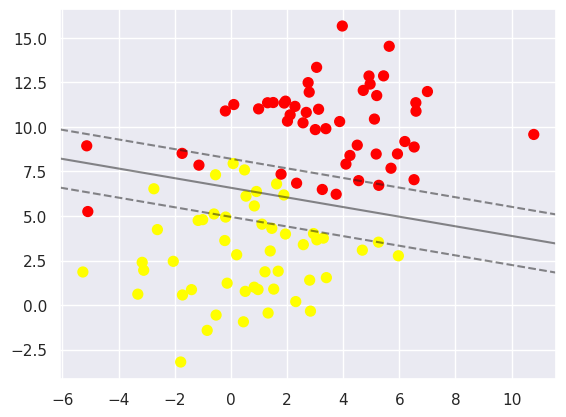

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [19]:
model.support_vectors_

array([[-5.09316458,  5.25183434],
       [ 3.25806748,  6.49047857],
       [ 3.75184518,  6.22186522],
       [ 1.78875985,  7.34910952],
       [ 2.3422707 ,  6.84301561],
       [ 5.26911028,  6.72348947],
       [-5.13179094,  8.941204  ],
       [-1.13551183,  7.85529846],
       [ 1.62905783,  6.80207771],
       [ 0.91219344,  6.37821533],
       [-0.54534533,  7.31704958],
       [ 0.48816414,  7.58824765],
       [ 0.54087485,  6.11673448],
       [ 1.88751636,  6.18345125],
       [ 0.08269721,  7.94617665],
       [-2.7408902 ,  6.53067457]])

#### 1.2非线形SVM

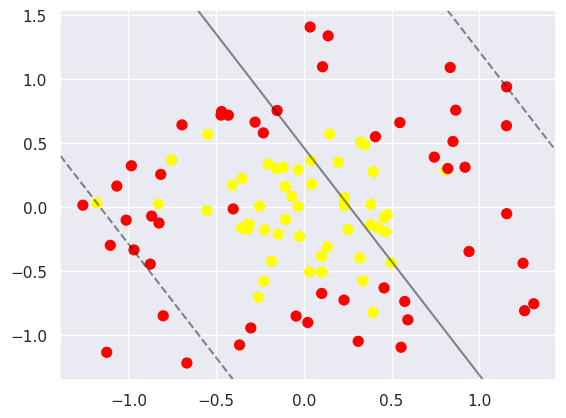

In [23]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.2, noise=.3)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

##### 使用一种简单的投影方法，即计算以中间团块为中心的圆形边界：

In [39]:
clf = SVC(kernel='rbf', C=50)
clf.fit(X, y)

SVC(C=50)

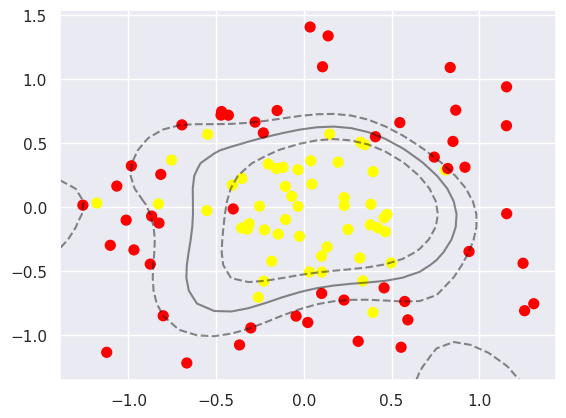

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### 调整 SVM： 软化边际——C

### 2.实例——数字识别（0-9）

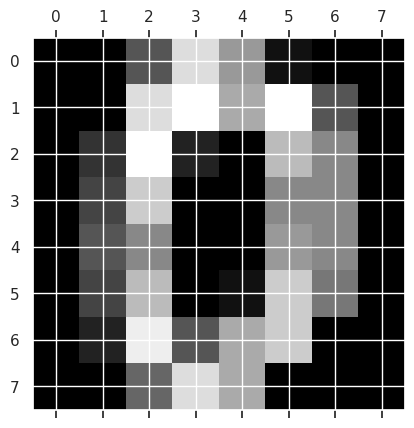

In [46]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
digits = datasets.load_digits()

plt.matshow(digits.images[0])
plt.show()

In [49]:
classifier = svm.SVC(gamma=0.001, C=100)
X,y = digits.data[:-300], digits.target[:-300]
Xt,yt = digits.data[300:], digits.target[300:]
classifier.fit(X,y)

SVC(C=100, gamma=0.001)

In [50]:
#做预测
print(classifier.predict(digits.data[-5].reshape(1,-1)))

[9]


## 3.实例——iris

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset = load_iris()

In [130]:
data=iris_dataset["data"]
target=iris_dataset["target"]
Xt=["sepal_length","sepal_width","petal_length","petal_width"]
yt=iris_dataset['target_names']

X = pd.DataFrame(data, columns=Xt)  
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state= 2048)

In [103]:
classifier = svm.SVC(gamma=0.001, C=100)

classifier.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [104]:
from sklearn.model_selection import GridSearchCV
#调优
param_grid = {
    'C':[40,50,60,90,100],
    'gamma':[0.003,0.001,0.005]
}

classifier = svm.SVC(gamma=0.001, C=100)
CV_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_classifier.fit(X_train, y_train)

CV_classifier.best_params_

{'C': 40, 'gamma': 0.005}

In [105]:
# 用最佳参数重新训练模型
classifier_ = svm.SVC(gamma=0.005, C=40)
classifier_.fit(X_train, y_train)

SVC(C=40, gamma=0.005)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 14  1]
 [ 0  0 14]]


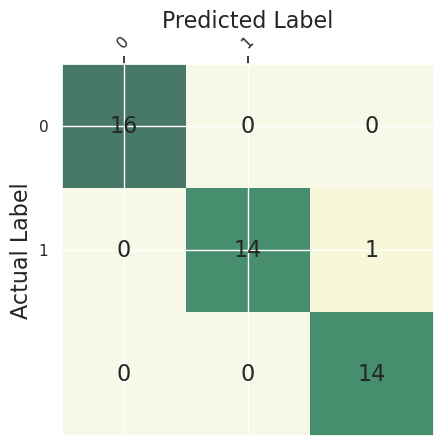

In [106]:
# 利用模型对测试集进行预测，输出target预测标签值和概率
y_test_pred = classifier_.predict(X_test)
#y_test_prob = classifier.predict_proba(X_test)

print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()

## 4.聚类
调参在于**选择特征**

In [58]:
#导入数据
data=iris_dataset["data"]
target=iris_dataset["target"]
Xt=["sepal_length","sepal_width","petal_length","petal_width"]
yt=iris_dataset['target_names']

data = pd.DataFrame(data, columns=Xt) 
X_ori=data.values

In [59]:
#对data进行数据标准化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(data*1.0)

In [60]:
# # 如果要对所有特征进行聚类，我们需要对类别型特征年龄进行0-1编码，使用pd.get_dummies(),drop掉第一个类别
# Genre = pd.get_dummies(dataset.Genre,prefix='Genre',drop_first=True)
# df_all = pd.concat([Genre,dataset.iloc[:,2:5]],axis=1)

# X_all_ori=df_all.values   #原数据
# X_all = std.fit_transform(X_all_ori*1.0) #标准化数据

##### 4.1 首先寻找最优的聚类个数
使用分层聚类图（hierarchy.dendrogram）来查看聚类的情况，它显示了每一个样本根据相似度大小如何逐步合并的过程。如果样本数量太多，不适合用这个方法。

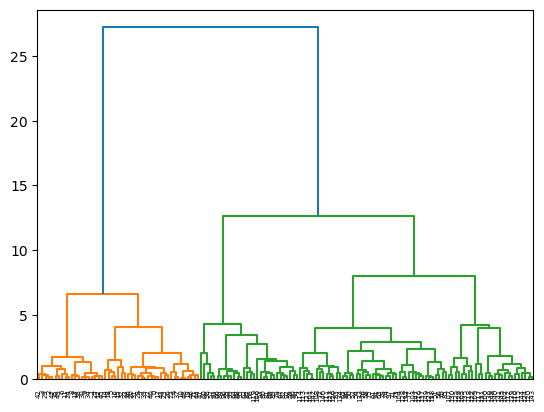

In [61]:
#法一：
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))
plt.show()

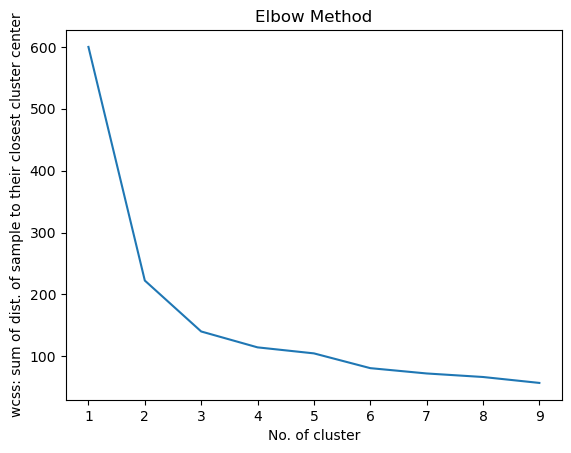

In [62]:
#法二：
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center')
plt.show()

##### 4.2 使用标准化后的数据X来进行聚类——Kmeans

In [63]:
kmeans_1=KMeans(n_clusters=3)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

In [64]:
# 聚类结果
print(cluster_pred)
# 类中心点
print(cluster_center)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


##### 4.3 可视化聚类结果——cluster

In [65]:
cluster = pd.DataFrame(cluster_pred,columns=['cluster'])
df_cluster = pd.concat([data,cluster],axis=1)
df_cluster.head()

# 在原始数据的基础上统计中心点的值（groupby cluster，求特征的均值）
mean = df_cluster.groupby('cluster').mean()
cluster_center_ori = mean[['petal_width','sepal_length']]
cluster_center_ori = cluster_center_ori.values
cluster_center_ori

array([[1.41320755, 5.80188679],
       [0.246     , 5.006     ],
       [1.97234043, 6.78085106]])

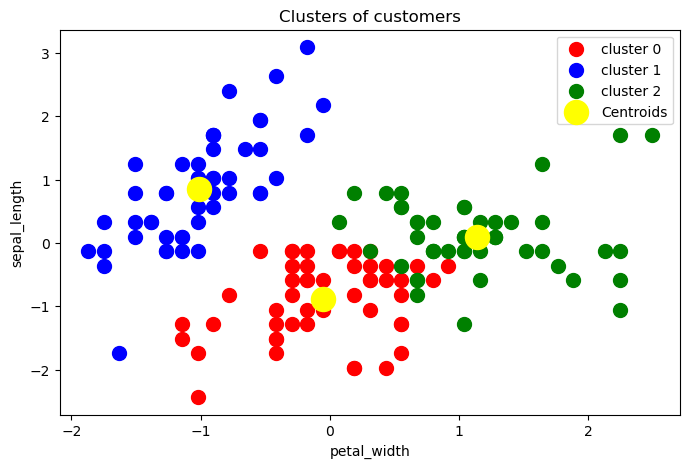

In [66]:
# 原始分类数据
data = pd.DataFrame(data, columns=Xt) 
X_ori=data.values
plt.figure(figsize=(8,5))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s = 100, c = 'red', label ='cluster 0' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s = 100, c = 'blue', label ='cluster 1' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s = 100, c = 'green', label ='cluster 2' )
plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('petal_width')
plt.ylabel('sepal_length')
plt.legend()
plt.show()

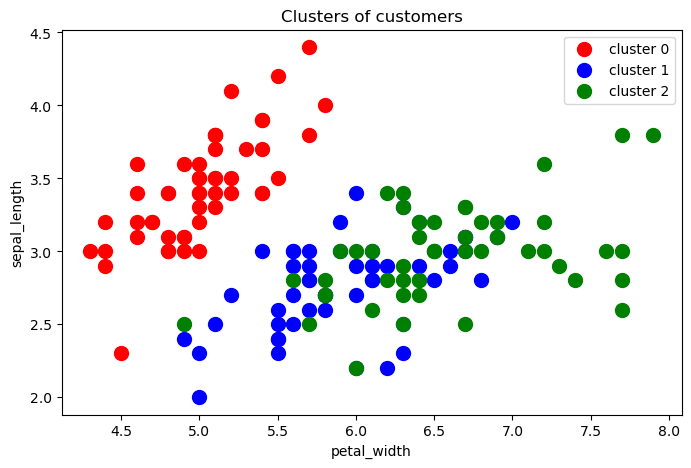

In [67]:
# 原始分类数据
target_ = pd.DataFrame(target,columns=['target'])
df_target = pd.concat([data,target_],axis=1)
df_target=df_target.values

plt.figure(figsize=(8,5))
plt.scatter(df_target[target==0,0],X_ori[target==0,1], s = 100, c = 'red', label ='cluster 0' )
plt.scatter(df_target[target==1,0],X_ori[target==1,1], s = 100, c = 'blue', label ='cluster 1' )
plt.scatter(df_target[target==2,0],X_ori[target==2,1], s = 100, c = 'green', label ='cluster 2' )

#plt.scatter(cluster_center_ori[:,0],cluster_center_ori[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('petal_width')
plt.ylabel('sepal_length')
plt.legend()
plt.show()

In [204]:
#sns.pairplot(df_cluster)

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cluster_ = cluster_ = cluster.replace({1: 0, 0: 1})

print(classification_report(target,cluster_))
print(confusion_matrix(target,cluster))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

[[ 0 50  0]
 [39  0 11]
 [14  0 36]]


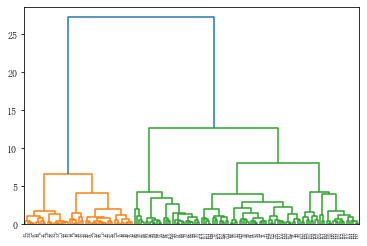

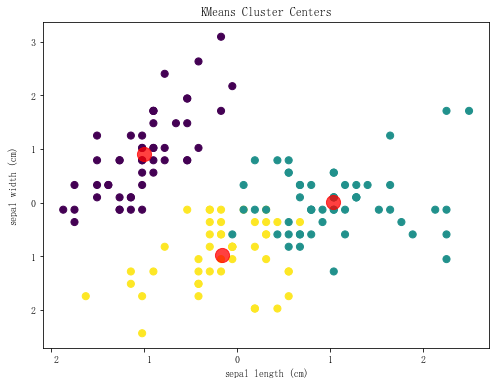

In [8]:
from sklearn.cluster import KMeans
from sklearn import datasets 
iris = datasets.load_iris() 
data = iris['data']
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
  #iris.feature_names = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = pd.DataFrame(data,columns=feature_names)
y = iris['target']

std = StandardScaler()
X_standard = std.fit_transform(X)
X = pd.DataFrame(X_standard, columns=X.columns)

# 寻找最优的聚类个数——图
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))
plt.show()

kmeans = KMeans(n_clusters=3, random_state=123456)
kmeans.fit(X)
cluster_pred = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_

cluster = pd.DataFrame(cluster_pred,columns=['cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_pred, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0],cluster_centers[:, 1], c='red', s=200, alpha=0.75)  # 簇中心
plt.title("KMeans Cluster Centers")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()